In [1]:
# Reber Grammar Implementation using Keras 

In [2]:
# Reber Grammar String Generator Class

In [3]:
import random as rnd

class ReberGrammarLexicon(object):

    lexicon = set() #contain Reber words
    graph = [ [(1,'T'), (2,'P')], \
            [(1, 'S'), (3, 'X')], \
            [(2,'T') ,(4, 'V')],  \
            [(2, 'X'), (5,'S')],           \
            [(3, 'P'),(5, 'V')],  \
            [(6,'E')] ]  #store the graph

    def __init__(self, num, maxSize = 1000): #fill Lexicon with num words

        self.maxSize = maxSize

        if maxSize < 5:
            raise NameError('maxSize too small, require maxSize > 4') 

        while len(self.lexicon) < num:

            word = self.generateWord()
            if word != None:
                self.lexicon.add(word)

    def generateWord(self): #generate one word

        c = 2
        currentEdge = 0
        word = 'B'

        while c <= self.maxSize:

            inc = rnd.randint(0,len(self.graph[currentEdge])-1)
            nextEdge = self.graph[currentEdge][inc][0]
            word += self.graph[currentEdge][inc][1]
            currentEdge = nextEdge
            if currentEdge == 6 :
                break
            c+=1

        if c > self.maxSize :
            return None

        return word

In [4]:
import numpy as np

In [5]:
maxsize = 20
inputdim = 7
outputdim = 7
hiddendim = 3

In [6]:
chars='BEPSTVX'

In [7]:
# One-hot encoding generated reber strings 

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
data = ['B', 'E', 'P', 'S', 'T', 'V', 'X']
values = np.array(data)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit(integer_encoded)

In [10]:
def func(word,start=0):
    word = np.array(list(word[start:]))
    encoded = label_encoder.transform(word)
    return onehot_encoded.transform(encoded.reshape(-1,1))    

In [11]:
# Padding each one-hot encoded input string to the maximum length

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
def pad(z):
    z = np.expand_dims(z,axis =0)
    padded = pad_sequences(z,maxlen=20,padding='post',value=[0.,0.,0.,0.,0.,0.,0.])
    return padded[0]    

In [15]:
def preprocessing(dictionary,start=0):
    length = len(dictionary)
    result = []
    
    for word in dictionary:
        result.extend(pad(func(word,start)))
        
    return np.array(result).reshape(length,maxsize,7)       

In [16]:
generator = ReberGrammarLexicon(2400,maxSize=20)

In [17]:
generator.lexicon

{'BTSXXTVPXVPXTTTVPSE',
 'BPVPXTTVPXTTVPXTTVVE',
 'BTSSSSXXVPXTTVPSE',
 'BTSSSSSSSXXTVPXTVVE',
 'BTSXXTTTTTVVE',
 'BPTVPXTTTTVPXVPXVPSE',
 'BTSSXXVPXTVPSE',
 'BTSSSSXXTTVPXTTVVE',
 'BPTVPXTTTTTVPXTVVE',
 'BPVPXTVPXTTVPXTTVVE',
 'BTXXTVPXVPXVPXVPSE',
 'BPTTTTTTVPXTVVE',
 'BPTTTTTTVPXTVPXTTVVE',
 'BTSSXXVPXTVPXVVE',
 'BTSXXTVPXTVPXTTTVPSE',
 'BTSSSXXTTVPXVPXTTVVE',
 'BTSSSXXVPXVPXTTVVE',
 'BPTTTTTTVPXTVPXVVE',
 'BPVPXTVPXVPXTVPXTVVE',
 'BPTTTTTTVPXVPXTTVVE',
 'BTXXTTTVPXVPXTVVE',
 'BTSSSXXTVPXVPXVPSE',
 'BPTTTTVPXTVPXTVVE',
 'BTXXTTTVPXTTTTVVE',
 'BTSSSSSSXXVPXTTTTVVE',
 'BTSSXXTTVPXTTTTVVE',
 'BTSXXTTTTTVPXVPXTVVE',
 'BTXXTVPXTTTTTVPXVPSE',
 'BPTTVPXVPXVVE',
 'BPTTTTVPXTTTTVVE',
 'BPTTVPXTTVPXVPXTVPSE',
 'BTSXXTTTTTTTTVPXVPSE',
 'BTSSSSSSSSSXXTTTTVVE',
 'BPTTVPXTTTVPXTTVPSE',
 'BPTTVPXVPXTVPXTVVE',
 'BPTTTVPXTTVPXTVPSE',
 'BTSSSXXTVPXVPXTTVPSE',
 'BPVPXVPXVPXTVPXVVE',
 'BTSSXXVPXTTTTTTTVPSE',
 'BTSXXTVPXVVE',
 'BPTVPXVPXVPXVPSE',
 'BTSXXTVPXTTTVPXVVE',
 'BTSSSXXTVPXTVPXTTVVE',
 'BTSSXXV

In [18]:
# Train-Test Split

In [19]:
X_train = preprocessing(list(generator.lexicon)[:2000])

In [20]:
y_train = preprocessing(list(generator.lexicon)[:2000],1)

In [21]:
X_test = preprocessing(list(generator.lexicon)[2000:])

In [22]:
y_test = preprocessing(list(generator.lexicon)[2000:],1)

In [23]:
#X_validation = preprocessing(list(generator.lexicon)[2000:])

In [24]:
#y_validation = preprocessing(list(generator.lexicon)[2000:],1)

In [25]:
# Model Creation

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,TimeDistributed,Dropout

In [27]:
model = Sequential()

In [28]:
model.add(SimpleRNN(hiddendim,activation='relu',return_sequences=True,input_shape=X_train.shape[1:]))

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
model.add(Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
model.add(TimeDistributed(Dense(outputdim,activation='softmax')))

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=5,verbose=1)

In [33]:
import tensorflow.keras.backend as K 
from tensorflow.keras.metrics import top_k_categorical_accuracy
def my_top_k(true, pred, num=2):
    true = K.reshape(true, (-1, outputdim))   
    pred = K.reshape(pred, (-1, outputdim))
    return top_k_categorical_accuracy(true, pred, k=num)

In [34]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=[my_top_k])

In [35]:
model.fit(x=X_train,y=y_train,batch_size=1,epochs=50,callbacks=[early_stop],validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1600/1600 [==============================] - 5s 3ms/sample - loss: 0.3089 - my_top_k: 0.5454 - val_loss: 0.2691 - val_my_top_k: 0.6588
Epoch 2/50
1600/1600 [==============================] - 5s 3ms/sample - loss: 0.2688 - my_top_k: 0.6292 - val_loss: 0.2422 - val_my_top_k: 0.7241
Epoch 3/50
1600/1600 [==============================] - 5s 3ms/sample - loss: 0.2584 - my_top_k: 0.6442 - val_loss: 0.2349 - val_my_top_k: 0.7509
Epoch 4/50
1600/1600 [==============================] - 5s 3ms/sample - loss: 0.2546 - my_top_k: 0.6478 - val_loss: 0.2317 - val_my_top_k: 0.7509
Epoch 5/50
1600/1600 [==============================] - 5s 3ms/sample - loss: 0.2523 - my_top_k: 0.6576 - val_loss: 0.2295 - val_my_top_k: 0.7285
Epoch 6/50
1600/1600 [==============================] - 5s 3ms/sample - loss: 0.2513 - my_top_k: 0.6538 - val_loss: 0.2282 - val_my_top_k: 0.7285
Epoch 7/50
1600/1600 [=======

In [36]:
import pandas as pd

In [38]:
losses = pd.DataFrame(model.history.history)

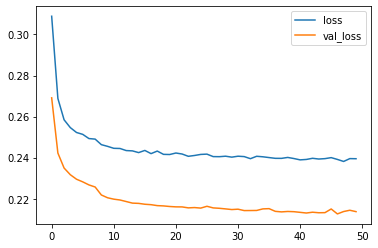

In [39]:
losses[['loss','val_loss']].plot()

In [40]:
score = model.evaluate(X_test, y_test, batch_size=1, verbose=1)

400/400 [==============================] - 0s 1ms/sample - loss: 0.2129 - my_top_k: 0.7380


In [41]:
z = model.predict(X_test)

In [ ]:
# Analysis of a string

In [49]:
print(list(chars))
print((z.round(decimals=2)[0]))

['B', 'E', 'P', 'S', 'T', 'V', 'X']
[[0.   0.   0.41 0.04 0.53 0.   0.02]
 [0.   0.01 0.32 0.11 0.21 0.18 0.17]
 [0.   0.   0.   0.   0.69 0.28 0.03]
 [0.   0.01 0.32 0.11 0.21 0.18 0.17]
 [0.   0.01 0.   0.22 0.   0.   0.77]
 [0.   0.   0.   0.   0.59 0.4  0.01]
 [0.   0.   0.   0.   0.6  0.39 0.01]
 [0.   0.   0.   0.   0.61 0.39 0.  ]
 [0.   0.   0.   0.   0.61 0.39 0.  ]
 [0.   0.   0.   0.   0.61 0.39 0.  ]
 [0.   0.   0.   0.   0.61 0.39 0.  ]
 [0.   0.   0.   0.   0.61 0.39 0.  ]
 [0.   0.01 0.32 0.11 0.21 0.18 0.17]
 [0.   0.64 0.17 0.17 0.   0.   0.02]
 [0.   0.01 0.32 0.11 0.21 0.18 0.17]
 [0.   0.01 0.32 0.11 0.21 0.18 0.17]
 [0.   0.01 0.32 0.11 0.21 0.18 0.17]
 [0.   0.01 0.32 0.11 0.21 0.18 0.17]
 [0.   0.01 0.32 0.11 0.21 0.18 0.17]
 [0.   0.01 0.32 0.11 0.21 0.18 0.17]]


In [50]:
temp(X_test[0])

['BPTVPXTTTTTTVVE']

In [51]:
y_test[0]

array([[0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# Loss function graph over epochs
# Binary Cross-Entropy Loss

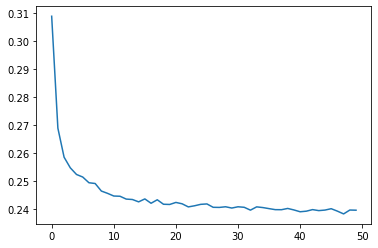

In [53]:
plt.plot(list(range(50)),model.history.history['loss'])

In [ ]:
# Retrieving back the hidden unit activation paterns

In [54]:
import tensorflow.keras.backend as K

In [55]:
lstm = model.layers[0]

# Get output from intermediate layer to visualize activations
attn_func = K.function(inputs = [model.get_input_at(0), K.learning_phase()],
           outputs = [lstm.output])

In [56]:
attn_func.outputs[0]

<tf.Tensor 'simple_rnn/transpose_1:0' shape=(?, 20, 3) dtype=float32>

In [57]:
h = attn_func(X_test)[0]

In [58]:
len(h)

400

In [59]:
points = (h.round(decimals=2))

In [60]:
points.shape

(400, 20, 3)

In [ ]:
# Hierarchical Clustering using Scipy

In [61]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [62]:
# Dendrogram

In [63]:
temp(X_test[0])

['BPTVPXTTTTTTVVE']

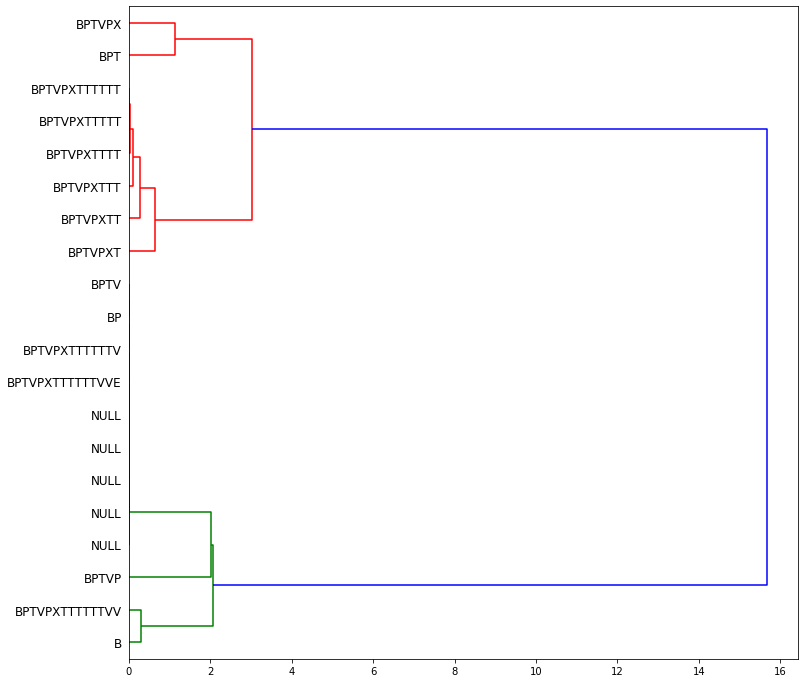

In [78]:
plt.figure(figsize=(12,12))
dendrogram = sch.dendrogram(sch.linkage(points[0],method='ward'),orientation='right',labels=labels[:20])

In [74]:
points[0]

array([[0.  , 0.  , 0.27],
       [0.  , 0.58, 0.  ],
       [0.  , 0.13, 0.  ],
       [0.  , 1.64, 0.  ],
       [0.26, 1.17, 1.17],
       [0.5 , 0.24, 2.39],
       [0.32, 0.55, 2.13],
       [3.61, 0.  , 0.11],
       [0.  , 1.88, 0.  ],
       [0.43, 1.09, 1.49],
       [0.5 , 0.28, 2.62],
       [0.47, 0.54, 2.34],
       [3.61, 0.  , 0.33],
       [0.  , 1.88, 0.  ],
       [0.43, 1.09, 1.5 ],
       [0.5 , 0.28, 2.62],
       [3.55, 0.  , 0.18],
       [0.  , 1.88, 0.  ],
       [0.  , 0.  , 0.  ],
       [0.05, 0.02, 0.  ]], dtype=float32)

In [ ]:
labels[40:60]

In [ ]:
temp(X_test[2])

In [ ]:
points[2]

In [ ]:
# Saving Model

In [ ]:
from tensorflow.keras.models import save_model,load_model

In [ ]:
model.save("reber.h5")

In [ ]:
model = load_model("reber.h5")

In [ ]:
a = model.predict(X_test)

In [ ]:
(a.round(decimals=3)[3] )

In [ ]:
print(chars)
print(y_test[0])

In [ ]:
points

In [ ]:
a.shape

In [44]:
def seq2char(sequence):
    
    if sequence.any():
        return chars[sequence.argmax()]
    else:
        return ''    

In [45]:
def word(X):
    l = X.shape[0]
    result = []
    
    for i in range(l):
        temp = ''
        for sequence in X[i]:
            temp = temp + seq2char(sequence)
        result.append(temp)
        
    return result

In [46]:
def temp(X):
    X = np.expand_dims(X,axis=0)
    l = X.shape[0]
    result = []
    
    for i in range(l):
        temp = ''
        for sequence in X[i]:
            temp = temp + seq2char(sequence)
        result.append(temp)
        
    return result

In [47]:
word_list = word(X_test)

In [65]:
def func(word):
    label_list = []
    k=0

    for i in range(1,21):
        if i <= len(word):
            label_list.append(word[:i])
        else:
            label_list.append('NULL')
        
        k = k + 1
        
    return label_list

In [71]:
points_temp = points.reshape(points.shape[0]*points.shape[1],points.shape[2])

In [72]:
X_test_temp = X_test.reshape(X_test.shape[0]*X_test.shape[1],X_test.shape[2])

In [73]:
def label(X):
    result = []
    
    for i in range(0,len(X),maxsize):
        word_no = i // maxsize
        
        result.extend(func(word_list[word_no]))
        
    return result  

In [74]:
labels = label(X_test_temp)

In [69]:
len(labels)

8000

In [66]:
func(word_list[0])

['B',
 'BP',
 'BPT',
 'BPTV',
 'BPTVP',
 'BPTVPX',
 'BPTVPXT',
 'BPTVPXTT',
 'BPTVPXTTT',
 'BPTVPXTTTT',
 'BPTVPXTTTTT',
 'BPTVPXTTTTTT',
 'BPTVPXTTTTTTV',
 'BPTVPXTTTTTTVV',
 'BPTVPXTTTTTTVVE',
 'NULL',
 'NULL',
 'NULL',
 'NULL',
 'NULL']

In [75]:
labels

['B',
 'BP',
 'BPT',
 'BPTV',
 'BPTVP',
 'BPTVPX',
 'BPTVPXT',
 'BPTVPXTT',
 'BPTVPXTTT',
 'BPTVPXTTTT',
 'BPTVPXTTTTT',
 'BPTVPXTTTTTT',
 'BPTVPXTTTTTTV',
 'BPTVPXTTTTTTVV',
 'BPTVPXTTTTTTVVE',
 'NULL',
 'NULL',
 'NULL',
 'NULL',
 'NULL',
 'B',
 'BP',
 'BPV',
 'BPVP',
 'BPVPX',
 'BPVPXT',
 'BPVPXTT',
 'BPVPXTTT',
 'BPVPXTTTT',
 'BPVPXTTTTT',
 'BPVPXTTTTTV',
 'BPVPXTTTTTVP',
 'BPVPXTTTTTVPX',
 'BPVPXTTTTTVPXT',
 'BPVPXTTTTTVPXTV',
 'BPVPXTTTTTVPXTVP',
 'BPVPXTTTTTVPXTVPX',
 'BPVPXTTTTTVPXTVPXV',
 'BPVPXTTTTTVPXTVPXVV',
 'BPVPXTTTTTVPXTVPXVVE',
 'B',
 'BT',
 'BTS',
 'BTSS',
 'BTSSS',
 'BTSSSS',
 'BTSSSSS',
 'BTSSSSSS',
 'BTSSSSSSS',
 'BTSSSSSSSS',
 'BTSSSSSSSSS',
 'BTSSSSSSSSSX',
 'BTSSSSSSSSSXX',
 'BTSSSSSSSSSXXV',
 'BTSSSSSSSSSXXVP',
 'BTSSSSSSSSSXXVPX',
 'BTSSSSSSSSSXXVPXT',
 'BTSSSSSSSSSXXVPXTV',
 'BTSSSSSSSSSXXVPXTVV',
 'BTSSSSSSSSSXXVPXTVVE',
 'B',
 'BT',
 'BTX',
 'BTXX',
 'BTXXT',
 'BTXXTT',
 'BTXXTTV',
 'BTXXTTVP',
 'BTXXTTVPX',
 'BTXXTTVPXV',
 'BTXXTTVPXVP',
 'BTXXTTVPXVPX',
 '

In [76]:
y_test_temp = y_test.reshape(y_test.shape[0]*y_test.shape[1],y_test.shape[2])

In [77]:
z_temp = z.reshape(z.shape[0]*z.shape[1],z.shape[2])

In [ ]:
#import tensorflow.keras.backend as K 
#from tensorflow.keras.metrics import top_k_categorical_accuracy
#def my_top_k(true, pred, num=2):
#    true = K.reshape(true, (-1, outputdim))   
#    pred = K.reshape(pred, (-1, outputdim))
#    return top_k_categorical_accuracy(true, pred, k=num)